In [22]:
import torch.nn as nn
import torch
import torch.utils.data as Data
from  sklearn.datasets import load_iris
import pandas as pd
import numpy as np
def getdata():
    train_data=load_iris()
    data=train_data['data']
    labels=train_data['target'].reshape(-1,1)
    total_data=np.hstack((data,labels))
    np.random.shuffle(total_data)
    train=total_data[0:120,:-1]
    test=total_data[120:,:-1]
    train_label=total_data[0:120,-1].reshape(-1,1)
    test_label=total_data[120:,-1].reshape(-1,1)
    return data,labels,train,test,train_label,test_label
data,labels,train,test,train_label,test_label = getdata()
# 数据预处理 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
# 4.对测试数据进行归一化处理
test=scaler.transform(test)


In [23]:
from sklearn.linear_model import LogisticRegression as LR
logistic_clf = LR(multi_class='auto', solver = 'lbfgs')
logistic_clf.fit(train, train_label)
y_pred = logistic_clf.predict(test)
y_true = test_label.reshape(1,-1)[0]
print(y_true)
print(y_pred)
accuracy = float((y_pred == y_true).astype(int).sum()) / (len(y_true))
print(accuracy)

[1. 0. 2. 1. 1. 1. 2. 0. 0. 2. 2. 1. 1. 0. 0. 2. 1. 2. 1. 2. 0. 2. 2. 0.
 2. 0. 0. 2. 1. 1.]
[1. 0. 2. 1. 1. 1. 2. 0. 0. 2. 2. 2. 1. 0. 0. 2. 1. 2. 1. 2. 0. 2. 2. 0.
 2. 0. 0. 2. 1. 1.]
0.9666666666666667


/home/sk49/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


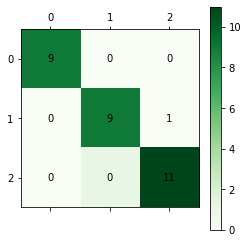

In [24]:
# 衡量模型性能

#true↓ predict→
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_true)
#print(cm)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')

In [25]:
# 分类报告
r = sm.classification_report(y_true, y_pred)
print('分类报告为：', r, sep='\n')

分类报告为：
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.90      0.95        10
         2.0       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

